## Observations and Insights 

In [ ]:
INSIGHTS

The heavier the mouse the bigger the mass of the Tumor 

Ramicane and Capomulin seemed to have the best results over time with a smaller average of tumor volume compared to the other drugs administered

infubinal seems to have been the least effective drug with one major outlier around 40mm3

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns



In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [7]:
mouse_metadata.nunique()

Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64

In [8]:
study_results.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [9]:
# Combine the data into a single dataset
df=pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")





# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [11]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [12]:
df["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [13]:
df.Timepoint.unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [14]:
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df.loc[df["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 



In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2=df.loc[df["Mouse ID"]!="g989"].reset_index(drop=True)
df2.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)




Mouse ID  Timepoint
a203      0            1
q610      5            1
q633      25           1
          20           1
          15           1
                      ..
i334      30           1
          25           1
          20           1
          15           1
z969      45           1
Length: 1880, dtype: int64

In [18]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avgs=df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
meds=df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varss=df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds=df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems=df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summ1=pd.concat([avgs,meds,varss,stds,sems],axis=1)
summ1.columns=["Mean","Median","Var","Std","SEM"]
summ1





,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
summ2=df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summ2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

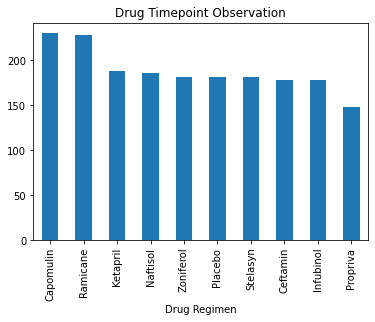

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar",title="Drug Timepoint Observation")
plt.show()


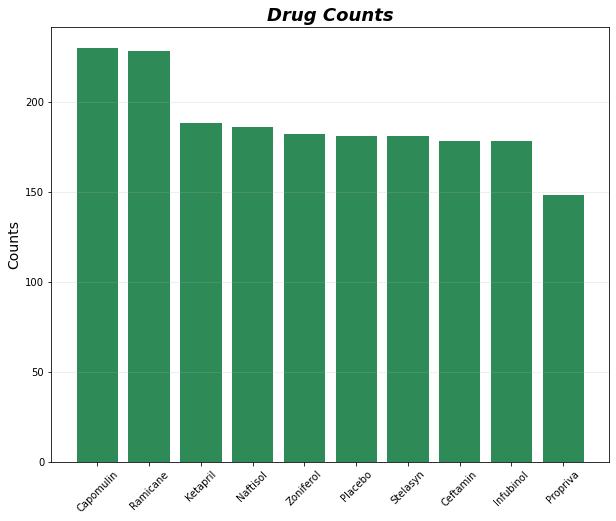

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
data=df2.groupby("Drug Regimen").size().sort_values(ascending=False).reset_index()
data.columns=["Drug Regimen", "Observations"]

plt.figure(figsize=(10,8))

plt.bar(data["Drug Regimen"], data.Observations, color="seagreen")
plt.title("Drug Counts",fontsize=18,fontstyle="italic", fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Counts",fontsize=14)
plt.grid(axis="y",alpha=.25)
plt.show()

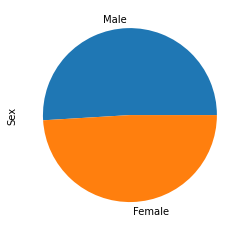

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df2.Sex.value_counts().plot(kind="pie")
plt.show()

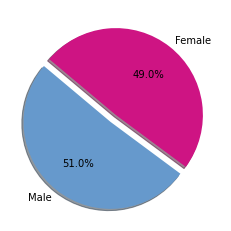

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
summ3=df2["Sex"].value_counts().reset_index()
summ3.columns=["Gender","Count"]

pies=summ3.Gender
pie_votes=summ3["Count"]
colors=["#6699CC","#CE1483"]
explode=(0.1,0)

#matplotlib
plt.pie(pie_votes, explode=explode,labels=pies,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
times=df2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df3=pd.merge(df2,times,on=["Mouse ID", "Timepoint"], how="inner")
df3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
df2.iloc[df2.groupby("Mouse ID").Timepoint.idxmax()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1791,a203,45,67.973419,2,Infubinol,Female,20,23
1773,a251,45,65.525743,1,Infubinol,Female,21,25
1770,a262,45,70.717621,4,Placebo,Female,17,29
1843,a275,45,62.999356,3,Ceftamin,Female,20,28
1389,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
495,z435,10,48.710661,0,Propriva,Female,12,26
1786,z578,45,30.638696,0,Ramicane,Male,11,16
1771,z581,45,62.754451,3,Infubinol,Female,24,25
1874,z795,45,65.741070,3,Naftisol,Female,13,29


In [27]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


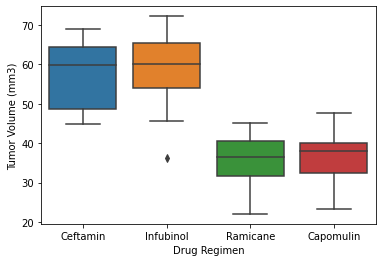

In [28]:
drugs=["Capomulin","Ramicane","Infubinol","Ceftamin"]
df4=df3.loc[df3["Drug Regimen"].isin(drugs)].reset_index(drop=True)
            
sns.boxplot(data=df4,x="Drug Regimen",y="Tumor Volume (mm3)")
plt.show()

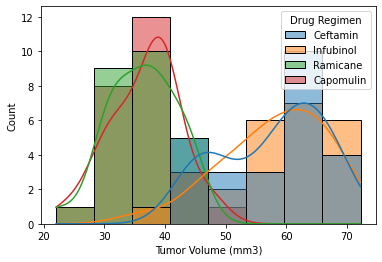

In [29]:
sns.histplot(data=df4,hue="Drug Regimen",x="Tumor Volume (mm3)", kde=True)
plt.show()

In [30]:
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
data=[]

for drug in drugs:
    sub=df4.loc[df4["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    lower_q=sub.quantile(0.25)
    upper_q=sub.quantile(0.75)
    iqr=upper_q-lower_q
    
    lower_bound=lower_q-1.5*iqr
    upper_bound=upper_q+1.5*iqr
    
    mask=(df4["Drug Regimen"]==drug) & ((df4["Tumor Volume (mm3)"]>upper_bound) | df4["Tumor Volume (mm3)"]<lower_bound)
    outliers = df4.loc[mask]
    print(outliers)
    data.append(sub)
    

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
11     w150         10           39.952347                 0    Capomulin   
14     r157         15           46.539206                 0    Capomulin   
16     f966         20           30.485985                 0    Capomulin   
33     j246         35           38.753265                 1    Capomulin   
38     b128         45           38.982878                 2    Capomulin   
42     t565         45           34.455298                 0    Capomulin   
43     l509         45           41.483008                 3    Capomulin   
47     g288         45           37.074024                 1    Capomulin   
53     r554         45           32.377357                 3    Capomulin   
56     g316         45           40.159220                 2    Capomulin   
59     y793         45           31.896238                 2    Capomulin   
61     m957         45           33.329098                 1    Capomulin   

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


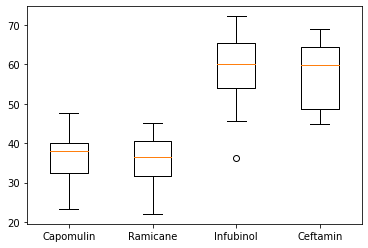

In [32]:
plt.boxplot(data, labels=drugs)
plt.show() 

## Line and Scatter Plots

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df2.loc[df2["Drug Regimen"]=="Capomulin"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
224,j246,0,45.000000,0,Capomulin,Female,21,21
225,r554,0,45.000000,0,Capomulin,Female,8,17
226,s185,0,45.000000,0,Capomulin,Female,3,17
227,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1841,s710,45,40.728578,1,Capomulin,Female,1,23
1846,j119,45,38.125164,1,Capomulin,Female,7,23
1865,i557,45,47.685963,1,Capomulin,Female,1,24
1875,r944,45,41.581521,2,Capomulin,Male,12,25


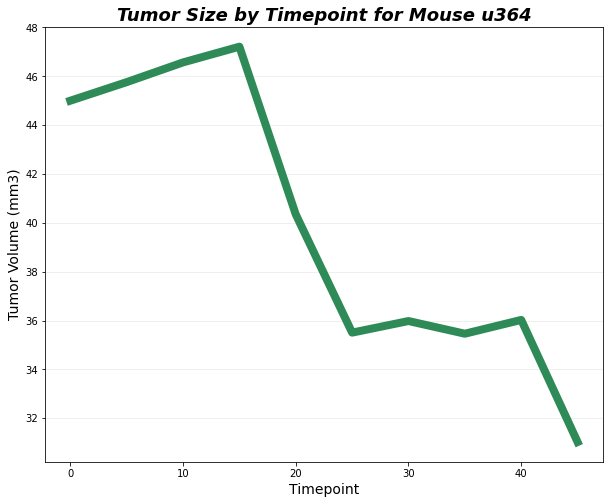

In [34]:
mouse=df2.loc[df2["Mouse ID"]=="u364"]
plt.figure(figsize=(10,8))

plt.plot(mouse.Timepoint,mouse["Tumor Volume (mm3)"],color="seagreen",linewidth=8)
plt.title("Tumor Size by Timepoint for Mouse u364",fontsize=18,fontweight="bold", fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)",fontsize=14)
plt.xlabel("Timepoint",fontsize=14)
plt.grid(axis="y",alpha=0.25)
plt.show()

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data=df2.loc[df2["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").agg({"Weight (g)":"mean","Tumor Volume (mm3)":"mean"}).reset_index()
data.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344


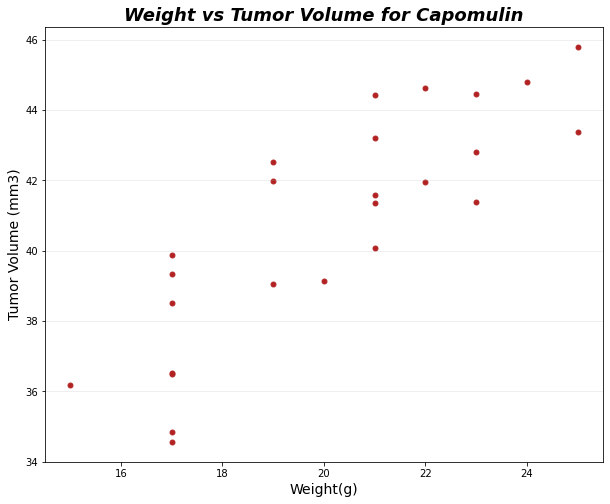

In [36]:
plt.figure(figsize=(10,8))


plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"],color="firebrick",s=24)
plt.title("Weight vs Tumor Volume for Capomulin",fontsize=18,fontweight="bold", fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)",fontsize=14)
plt.xlabel("Weight(g)",fontsize=14)
plt.grid(axis="y",alpha=0.25)
plt.show()

## Correlation and Regression

In [38]:
import seaborn as sns
from scipy import stats as st

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
data.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


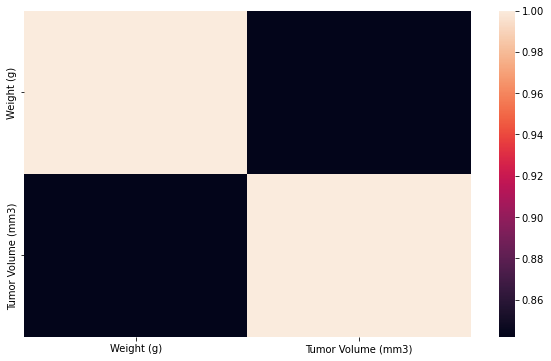

In [41]:
corrs=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.show()

The r-squared is: 0.7088568047708723


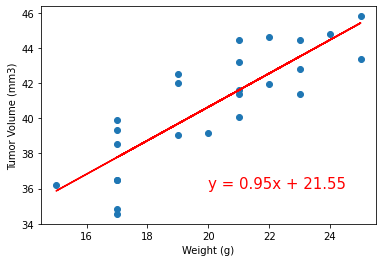

In [53]:
# Print out the r-squared value along with the plot.
x_values = data['Weight (g)']
y_values = data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [43]:
feature = data[['Weight (g)']]
target = data['Tumor Volume (mm3)']

In [44]:
 # STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Tumor Volume (mm3)   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     56.00
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.32e-07
Time:                        23:31:16   Log-Likelihood:                -48.966
No. Observations:                  25   AIC:                             101.9
Df Residuals:                      23   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5522      2.591      8.318      0.000      16.192      26.912
Weight (g)     0.9544      0.128      7.483      0.000       0.691       1.218
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.951
Skew:                          -0.025   Prob(JB):                        0.622
Kurtosis:                       2.046   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#scikitlearn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)
print(reg.score(np.array(feature), np.array(target)))

[0.95443969]
21.552160532685015
0.7088568047708721


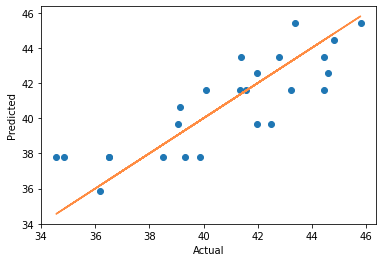

In [50]:
plt.scatter(y_values, reg.predict(np.array(feature)))
plt.plot(y_values, y_values,color="#FF8C42")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()